In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
PATH_TO_IMAGES = 'images/'
JPG = '.jpg'

In [3]:
def get_name(path, jpg, i):
    num = '0' * (3 - len(str(i))) + str(i)
    return path + num + jpg    

In [4]:
image_names = [get_name(PATH_TO_IMAGES, JPG, i) for i in range(1, 6)]

In [5]:
img_1 = cv2.imread(image_names[0], 0)

In [6]:
img_1

array([[ 66,  61, 214, ...,   5,   1,   1],
       [121,  59,  50, ...,   4,   7,  12],
       [ 84,  46,  28, ...,   9,  22,  33],
       ...,
       [  5,   7,   9, ...,   5,   8,   9],
       [  8,   9,   9, ...,   6,  10,  13],
       [ 12,  11,   8, ...,   5,  10,  13]], dtype=uint8)

In [8]:
img = cv2.medianBlur(img_1,5)

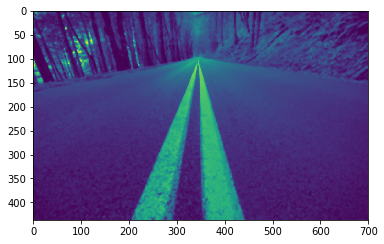

In [10]:
plt.imshow(img)

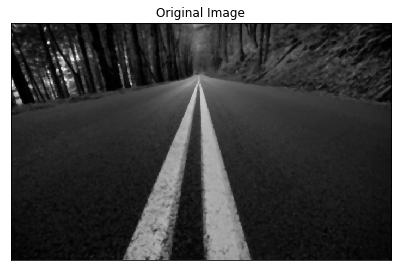

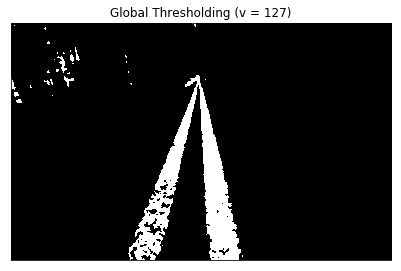

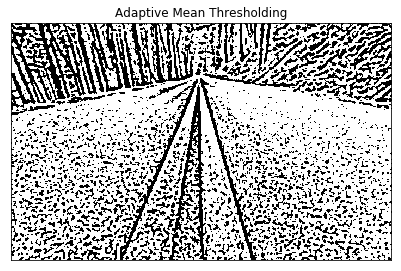

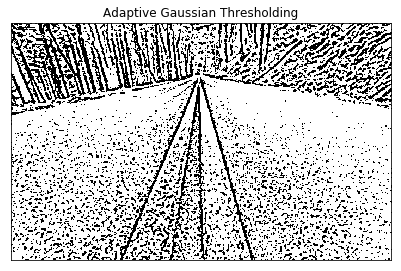

In [23]:
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# $
x = \left[
\begin{array}{l l}
\frac{ty}{n - 1} - s
\end{array}
\right]
$

In [41]:
import random

In [48]:
def get_state(val, mode=0):
    if mode == 1:
        if val > 0:
            return 1
        else: return 0
    else:
        if val == 0:
            return 1
        else: return 0

In [151]:
def get_x(y_, s_, t_, n):
    
    x_ = round((t_ * y_ / (n - 1)) - s_)
    return x_

In [152]:
def get_idx(img, s_, t_, height):
    
    idx_s = [s_]
    
    
    for y_ in range(1, height):
        x = get_x(y_, s_, t_, height)
        idx_s.append(x)
    return idx_s

In [157]:
def my_Hough_transform(img):
    
    height, width = img.shape
    
    #матрица, которую будем заполнять
    to_fill = np.zeros(shape=(width, width))
    
    for s in range(width):
        for t in range(width - s):
            
            idx_s = get_idx(img, s, t, height)
            
            for i, x_ in enumerate(idx_s):
                value = get_state(img[i, x_])
                to_fill[s, t] += value
    
    return to_fill
            

In [158]:
try1 = my_Hough_transform(th1)

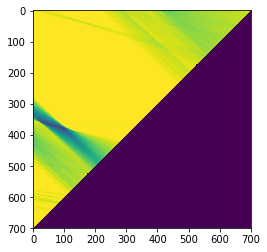

In [161]:
plt.imshow(try1)

In [160]:
print(find_max(try1))

(0, 59)


In [100]:
def find_max(patterns):
    max_ = 0
    s = t = 0
    len1, len2 = patterns.shape
    for i in range(len1):
        for j in range(len2):
            if patterns[i, j] > max_:
                max_ = patterns[i, j]
                s = i
                t = j
    return s, t
        

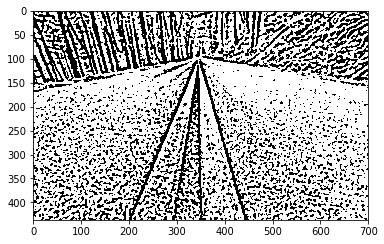

In [91]:
plt.imshow(th2, 'gray')

In [102]:
class my_Query:
    
    def __init__(self, size=5):
        
        self.__storage = []
        self.length = 0
        
    def push(self, value):
        
        if self.length < 5: self.length += 1
            
        for i in reversed(range(1, 6)):
            self.storage[i] = self.storage[i - 1]
            
    